In [37]:
import numpy
from matplotlib import pyplot
import math
%matplotlib inline

In [38]:
x_sources = numpy.loadtxt('../AeroPython/lessons/resources/NACA0012_x.txt')
y_sources = numpy.loadtxt('../AeroPython/lessons/resources/NACA0012_y.txt')
sigmas = numpy.loadtxt('../AeroPython/lessons/resources/NACA0012_sigma.txt')

In [39]:
x = numpy.linspace(-1,2,51)
y = numpy.linspace(-0.5,0.5,51)
X,Y = numpy.meshgrid(x,y)

In [40]:
u = 0
v = 0
psi = 0

for i in range (100):
    u_linshi = sigmas[i]/(2*math.pi) * (X-x_sources[i])/((X-x_sources[i])**2 + (Y - y_sources[i])**2)
    v_linshi = sigmas[i]/(2*math.pi) * (Y-y_sources[i])/((X-x_sources[i])**2 + (Y - y_sources[i])**2)
    psi_linshi = sigmas[i]/(2*math.pi) * numpy.arctan2(Y-y_sources[i], X-x_sources[i])
    
    u = u+u_linshi
    v = v+v_linshi
    psi = psi+psi_linshi

In [41]:
u = u+1
v = v+0
psi = psi+Y

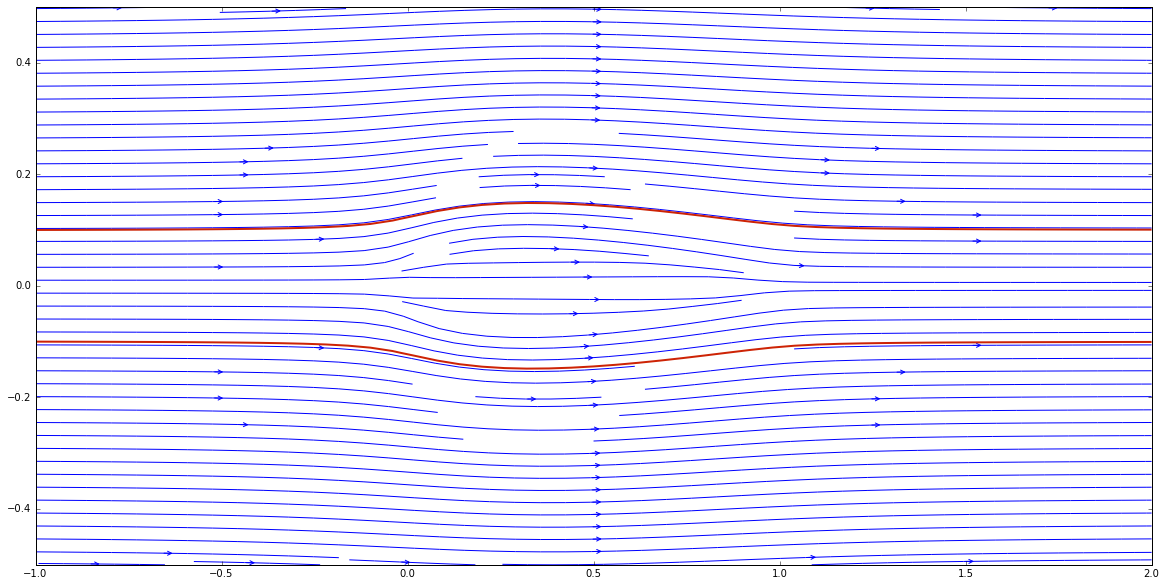

In [62]:
pyplot.figure(figsize=(20,10))
pyplot.streamplot(X, Y, u, v, density=1.5, linewidth=1, arrowsize=1, arrowstyle='->')
pyplot.xlim(-1,2)
pyplot.ylim(-0.5,0.5)
pyplot.contour(X, Y, psi, 
            levels=[-0.1,0.1], 
            colors='#CD2305', linewidths=2, linestyles='solid');

In [42]:
size = 10
pyplot.figure(figsize=(size,30 )

pyplot.scatter(x_sources, y_sources, color='#CD2305', s=80, marker='o')

# calculates the stagnation point

pyplot.contour(X, Y, psi, 
            levels=[0, 0], 
            colors='#CD2305', linewidths=2, linestyles='solid');

SyntaxError: invalid syntax (<ipython-input-42-58f9c39cd70b>, line 4)

In [14]:
psi = sigmas/(2*math.pi) * numpy.arctan2((Y-y_sources)/(X-x_sources))

ValueError: operands could not be broadcast together with shapes (51,51) (100,) 

In [18]:
numpy.shape(sigmas)

(100,)

In [24]:
sigmas.shape

(100,)

In [21]:
x_sources

array([  9.99506682e-01,   9.97535357e-01,   9.93600488e-01,
         9.87717603e-01,   9.79909919e-01,   9.70208251e-01,
         9.58650885e-01,   9.45283433e-01,   9.30158651e-01,
         9.13336230e-01,   8.94882559e-01,   8.74870468e-01,
         8.53378933e-01,   8.30492774e-01,   8.06302311e-01,
         7.80903012e-01,   7.54395117e-01,   7.26883241e-01,
         6.98475961e-01,   6.69285387e-01,   6.39426720e-01,
         6.09017800e-01,   5.78178637e-01,   5.47030938e-01,
         5.15697630e-01,   4.84302370e-01,   4.52969062e-01,
         4.21821363e-01,   3.90982200e-01,   3.60573280e-01,
         3.30714613e-01,   3.01524039e-01,   2.73116759e-01,
         2.45604883e-01,   2.19096988e-01,   1.93697689e-01,
         1.69507226e-01,   1.46621067e-01,   1.25129532e-01,
         1.05117441e-01,   8.66637700e-02,   6.98413486e-02,
         5.47165669e-02,   4.13491154e-02,   2.97917495e-02,
         2.00900806e-02,   1.22823970e-02,   6.39951199e-03,
         2.46464256e-03,